# MODIFICAÇÔES INICIAM

# Read Pre-train Model

In [87]:
import pandas as pd # data manipulation and analysis
it = pd.read_csv('intent_test.csv')
it_train = pd.read_csv('intent_train.csv')

In [81]:
it.head(20)

,menssage,label
0,My laptop screen is flickering,support
1,I'm interested in a new PC,sales
2,I want to acquire a new desktop,sales
3,"My PC is broken, so I'm looking for a new one",sales
4,"Do you sell a complete PC, with mouse, keyboar...",sales
5,My laptop battery is not charging,support
6,My brother needs a fast PC for graphic design ...,sales
7,Is there a best way to make the transition fro...,support
8,Hello! I am looking to purchase a computer.,sales
9,My laptop screen is flickering,support


In [82]:
it_train.head()

,menssage,label
0,would like additional product,sales
1,- look for qualifi product,sales
2,- look for product,sales
3,- submit order purchase,sales
4,- i am purchase product,sales


# Treino e Teste

In [48]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer
import itertools

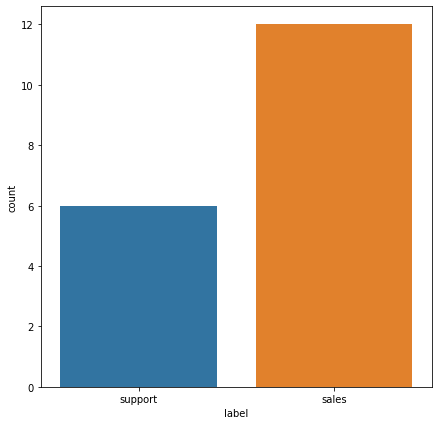

In [49]:
fig = plt.figure(figsize=(7, 7))  
sns.countplot(x='label', data=it);

<AxesSubplot:ylabel='label'>

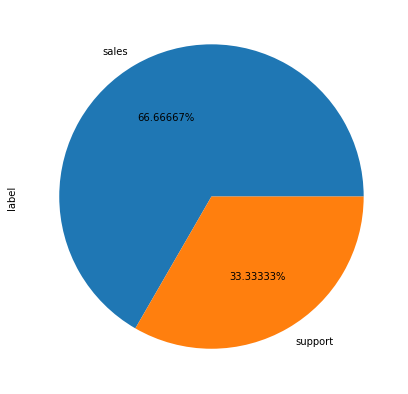

In [50]:
fig = plt.figure(figsize=(7, 7))   
it.label.value_counts().plot(kind='pie', autopct='%.5f%%')

In [129]:
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, make_scorer


def plot_LSB(test_data, test_labels, savepath="PCB_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red','blue']
        if plot:
            plt.scatter(lsa_scores[:,"sales"], lsa_scores[:,"support"], s=3, alpha=.3, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color = "red", label = "sales")
            blue_patch = mpatches.Patch(color = 'blue',label = 'support')
            plt.legend(handles=[red_patch, blue_patch], prop={'size': 20})

def plot_intent_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.winter): 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title, fontsize=30) 
    plt.colorbar() 
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, fontsize=20) 
    plt.yticks(tick_marks, classes, fontsize=20) 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color= "white" if cm[i, j] < thresh else "black", fontsize=30) 
    plt.tight_layout() 
    return plt


def confusionI(target, pred):
    cm = confusion_matrix(target, pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_intent_confusion_matrix(cm, classes=['sales','support'], normalize=False, title='Confusion matrix')
    plt.show()
    
    
# Calculate F1-Score
from sklearn.metrics import f1_score

def changeIntent(x):
    """"
    Receive a local string
    Return the label hot encoded
    """
    if x.lower() == 'sales':
        return 1
    if x.lower() == 'support':
        return 0

def intent_rotulation(x):
    label_count=[]
    for item in x.label:
        label_count.append(changeIntent(item))
    
    x.loc[:,'rotulation']=label_count   

In [130]:
intent_rotulation(it_train)
print(it_train)

                                             menssage    label  rotulation
0                       would like additional product    sales           1
1                            look for qualifi product    sales           1
2                                    look for product    sales           1
3                               submit order purchase    sales           1
4                               i am purchase product    sales           1
5                                    to make purchase    sales           1
6                         i want to final my purchase    sales           1
7                            look to purchase product    sales           1
8                            i need a qualifi product    sales           1
9                               look at product order    sales           1
10                              i am shop for product    sales           1
11                                 i want to purchase    sales           1
12                       

In [131]:
intent_rotulation(it)
print(it)



                                             menssage    label  rotulation
0                      My laptop screen is flickering  support           0
1                          I'm interested in a new PC    sales           1
2                     I want to acquire a new desktop    sales           1
3       My PC is broken, so I'm looking for a new one    sales           1
4   Do you sell a complete PC, with mouse, keyboar...    sales           1
5                   My laptop battery is not charging  support           0
6   My brother needs a fast PC for graphic design ...    sales           1
7   Is there a best way to make the transition fro...  support           0
8         Hello! I am looking to purchase a computer.    sales           1
9                      My laptop screen is flickering  support           0
10                         I'm interested in a new PC    sales           1
11                    I want to acquire a new desktop    sales           1
12      My PC is broken, 

In [132]:
#Gráfico de dispersão
#count = CountVectorizer(ngram_range = (1,3))
#xtrain_matrix = count.fit_transform(it.rotulation)
#ytrain_matrix = it.menssage
#fig = plt.figure(figsize=(8, 8))  
#plot_LSB(xtrain_matrix,ytrain_matrix)

In [133]:
XI = it['menssage']
yI = it['rotulation']

In [134]:
#X_train, X_test, y_train, y_test = train_test_split(XI, yI, stratify=yI, test_size=0.2, random_state=7)

In [137]:
X_train = it_train['menssage'] 
y_train = it_train['rotulation']
X_test = it['menssage']
y_test = it['rotulation']

In [138]:


print("--------X_train")
print(X_train)
print("--------y_train")
print(y_train)
print("--------X_test")
print(X_test)
print("--------y_test")
print(y_test)

--------X_train
0                         would like additional product
1                              look for qualifi product
2                                      look for product
3                                 submit order purchase
4                                 i am purchase product
5                                      to make purchase
6                           i want to final my purchase
7                              look to purchase product
8                              i need a qualifi product
9                                 look at product order
10                                i am shop for product
11                                   i want to purchase
12                                     i want to budget
13                         how much does a product cost
14    i just email you my shop cart can you do bette...
15    just an product work with larg amount of numer...
16                      can you help me with a purchase
17    i dont want to have someth

In [139]:
vectorizer = CountVectorizer(ngram_range = (1,3))
#vectorizer = TfidfVectorizer(min_df=10) resultado final piora
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Modelo: Máquinas de Vetores de Suporte - SVC

In [140]:
from sklearn.svm import SVC

In [141]:
param_grid = {'C':[10,100,1000],'gamma':[1,0.1,0.001,0.0001,0.00001], 'kernel':['linear','rbf']}
gridSVC = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
gridSVC.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, 

[CV] END ....................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s
[CV] END ....................C=1000, gamma=1e-05, kernel=rbf; total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [142]:
gridSVC.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

# Validação

In [143]:
svc = SVC(C = 100 , gamma=0.001 , kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(metrics.classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.3333    0.6667    0.4444         6
           1     0.6667    0.3333    0.4444        12

    accuracy                         0.4444        18
   macro avg     0.5000    0.5000    0.4444        18
weighted avg     0.5556    0.4444    0.4444        18



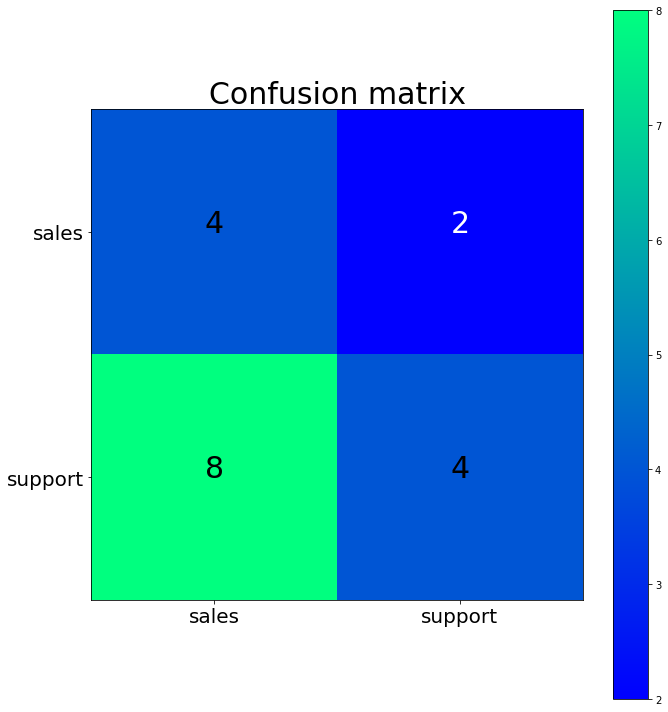

None


In [144]:
print(confusionI(y_test, y_pred))

# Modelo: Regressão Linear Logística

In [145]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train, y_train)

LogisticRegression(C=1)

# Validação

In [146]:
pred = model.predict(X_test)

In [147]:
print(metrics.classification_report(y_test,pred,digits=4))

              precision    recall  f1-score   support

           0     0.3333    0.6667    0.4444         6
           1     0.6667    0.3333    0.4444        12

    accuracy                         0.4444        18
   macro avg     0.5000    0.5000    0.4444        18
weighted avg     0.5556    0.4444    0.4444        18



In [148]:
grid={"C":np.logspace(0, 4, 10), "penalty":["l1","l2"]}# l1 lasso l2 ridge

logreg_cv= GridSearchCV(LogisticRegression() , grid , cv=10, scoring=make_scorer(f1_score, average='weighted'))
logreg_cv.fit(X_train,y_train)

/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/rlnd/.local/lib/python3.8/site-packages/sklearn/mod

/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/rlnd/.local/lib/python3.8/site-packages/sklearn/mod

/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/rlnd/.local/lib/python3.8/site-packages/sklearn/mod

/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/rlnd/.local/lib/python3.8/site-packages/sklearn/mod

/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/rlnd/.local/lib/python3.8/site-packages/sklearn/mod

/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/rlnd/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/rlnd/.local/lib/python3.8/site-packages/sklearn/mod

/home/rlnd/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [ nan 0.86  nan 0.86  nan 0.86  nan 0.86  nan 0.86  nan 0.86  nan 0.86
  nan 0.86  nan 0.86  nan 0.86]
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, average=weighted))

In [149]:
# View best hyperparameters
print(logreg_cv.best_params_)

{'C': 1.0, 'penalty': 'l2'}


# Validação

In [150]:
model = LogisticRegression(penalty="l2", C= 7.742636826811269)
model.fit(X_train, y_train)

LogisticRegression(C=7.742636826811269)

In [151]:
pred = model.predict(X_test)

              precision    recall  f1-score   support

           0     0.3333    0.6667    0.4444         6
           1     0.6667    0.3333    0.4444        12

    accuracy                         0.4444        18
   macro avg     0.5000    0.5000    0.4444        18
weighted avg     0.5556    0.4444    0.4444        18



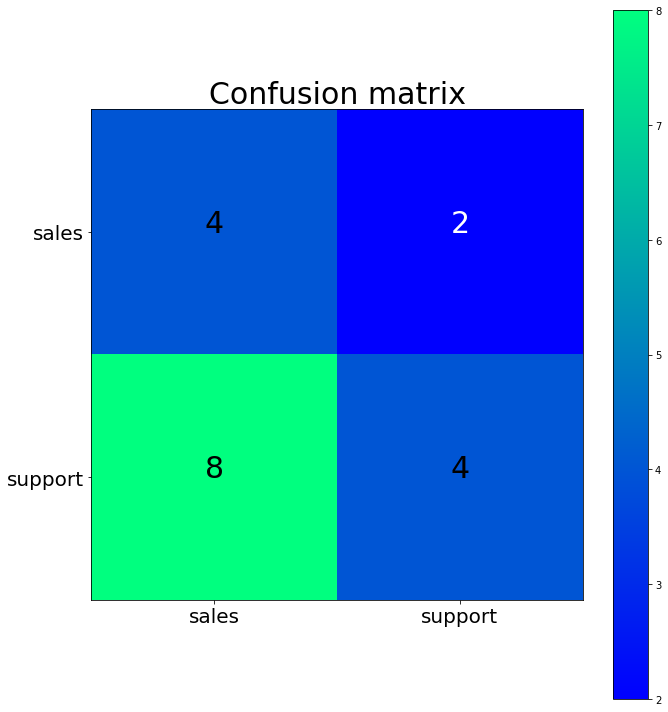

None


In [153]:
print(metrics.classification_report(y_test,pred,digits=4))
print(confusionI(y_test, y_pred))

# Modelo: Multinomial Naive Bayes

In [154]:
gaussian = MultinomialNB()

In [155]:
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)

# Validação

              precision    recall  f1-score   support

           0     0.5000    0.3333    0.4000         6
           1     0.7143    0.8333    0.7692        12

    accuracy                         0.6667        18
   macro avg     0.6071    0.5833    0.5846        18
weighted avg     0.6429    0.6667    0.6462        18



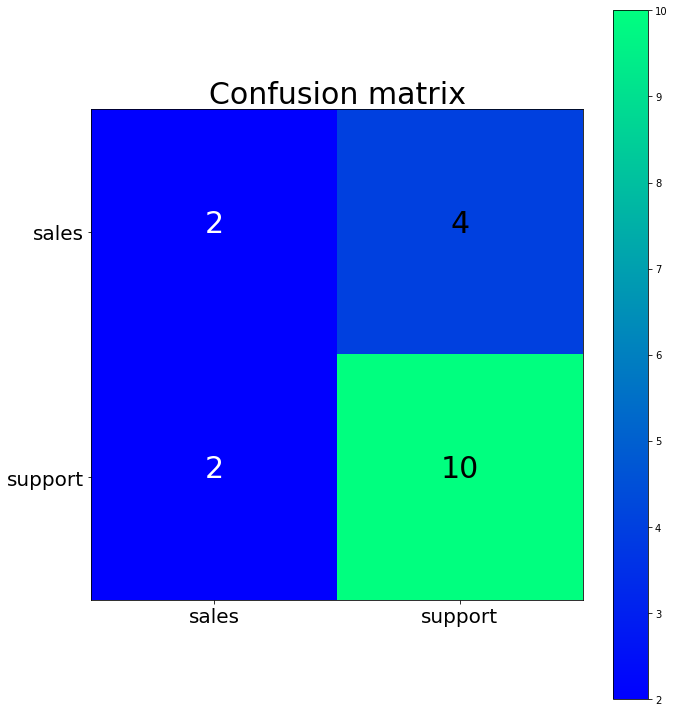

None


In [157]:
print(metrics.classification_report(y_test, y_pred,digits=4))
print(confusionI(y_test, y_pred))

# Modelo: Árvore de Decisão

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
gridTree = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=10, scoring=make_scorer(f1_score, average='weighted'))
gridTree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             scoring=make_scorer(f1_score, average=weighted))

In [160]:
# View best hyperparameters
print(gridTree.best_params_)

{'criterion': 'entropy', 'max_depth': 12}


# Validação

In [161]:
decision_tree = DecisionTreeClassifier(criterion='gini',max_depth=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

In [162]:
print(metrics.classification_report(y_test, y_pred,digits=4))


              precision    recall  f1-score   support

           0     0.4286    1.0000    0.6000         6
           1     1.0000    0.3333    0.5000        12

    accuracy                         0.5556        18
   macro avg     0.7143    0.6667    0.5500        18
weighted avg     0.8095    0.5556    0.5333        18



In [163]:
print(confusion(y_test, y_pred))

NameError: name 'confusion' is not defined

In [164]:
print('FIM')

FIM
